<a href="https://colab.research.google.com/github/Ebasurtos/Estadistica-y-probabilidad/blob/main/Proyecto_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data_csv.csv", sep=";")

print("Primeras filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df[['Precio']].describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
     Marca Modelo  RAM  Almacenamiento  Pantalla Departamento Provincia  \
0  Marca 1  Mod 5  8.0           256.0       6.7         Lima      Lima   
1  Marca 1  Mod 5  8.0           256.0       6.7         Lima      Lima   
2  Marca 1  Mod 5  8.0           256.0       6.7         Lima      Lima   
3  Marca 1  Mod 5  8.0           256.0       6.7         Lima      Lima   
4  Marca 1  Mod 5  8.0           256.0       6.7         Lima      Lima   

          Distrito       Fecha  Nro_Mes  Dia Centro_comercial    Tipo_retail  \
0       Ventanilla   1/07/2024        7    1      Stand alone   Supermercado   
1              Ate  26/02/2024        2   26             CC23   Supermercado   
2    Independencia   5/04/2024        4    5             CC34  Departamental   
3  Cercado de Lima  27/03/2024        3   27      Stand alone  Departamental   
4  Cercado de Lima  29/03/2024        3   29      Stand alone  Departamental   

  Retail Tienda Tipo_servicio  Venta  Pr

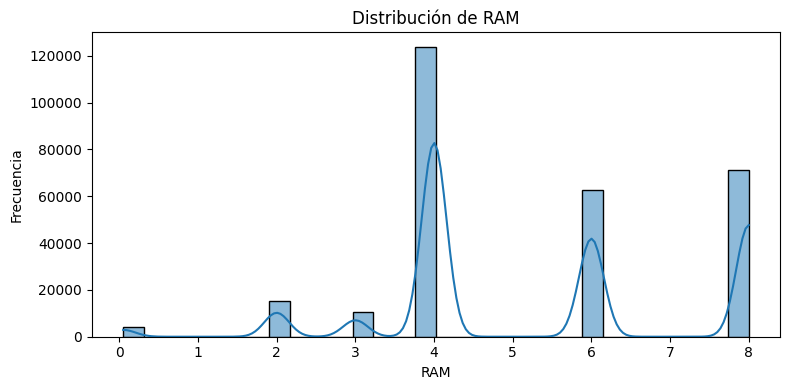

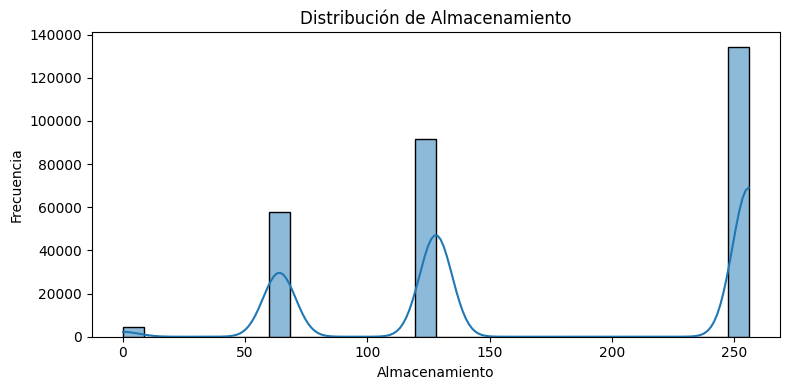

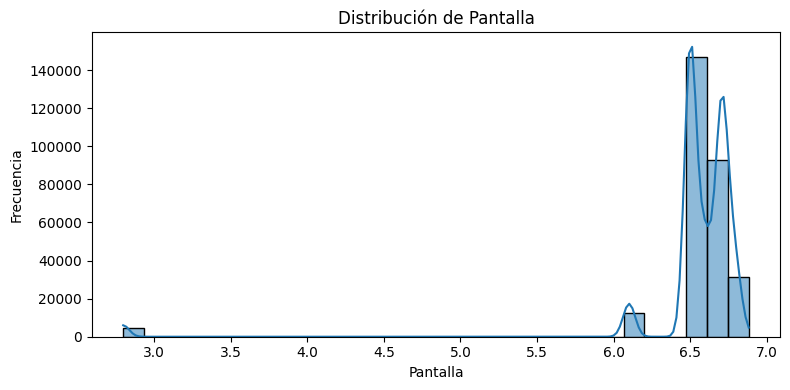

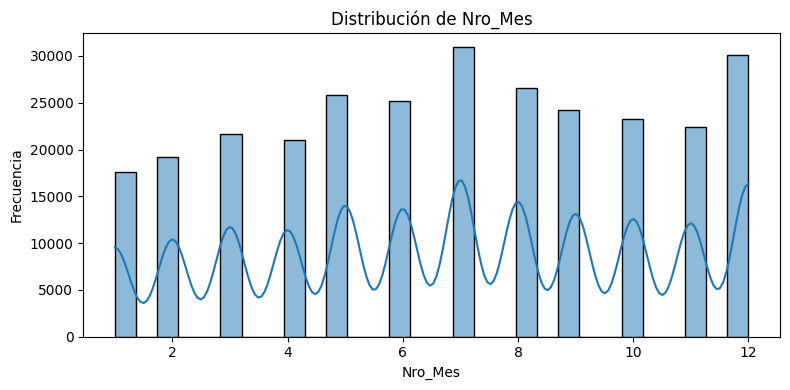

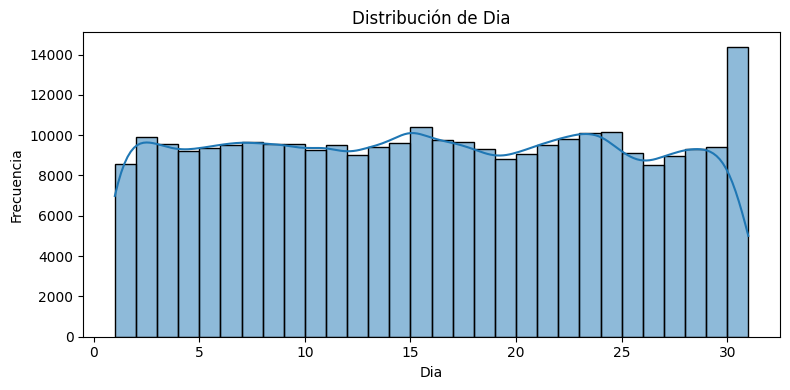

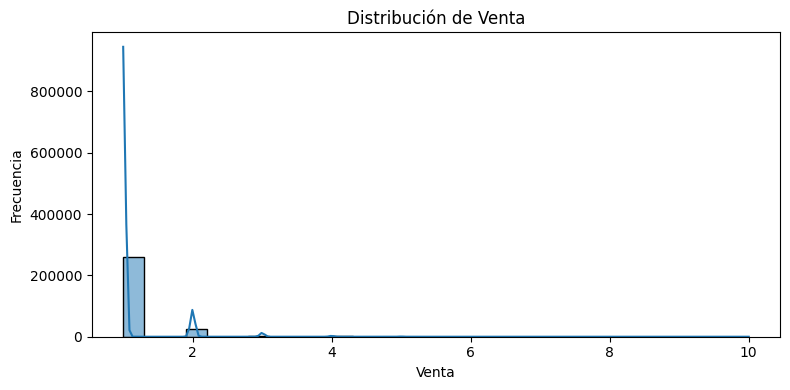

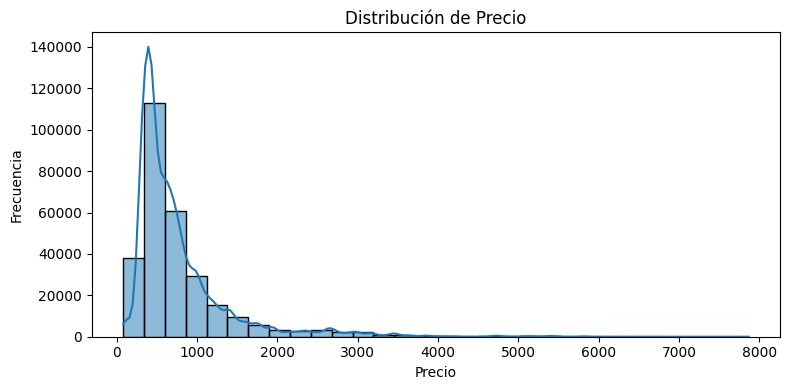

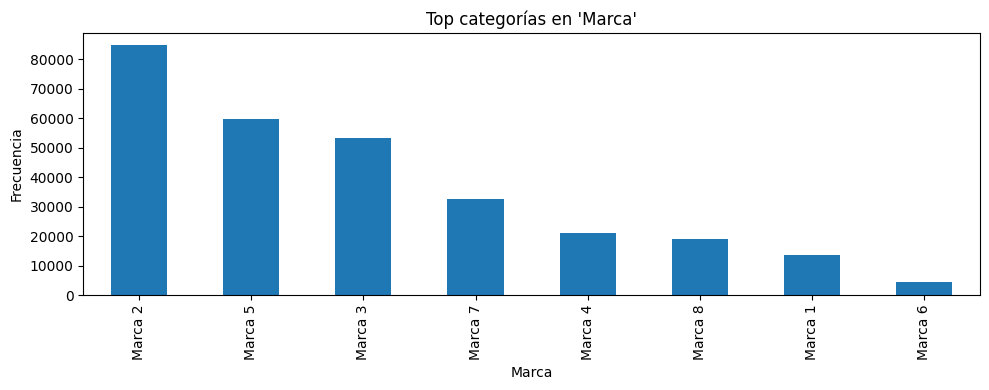

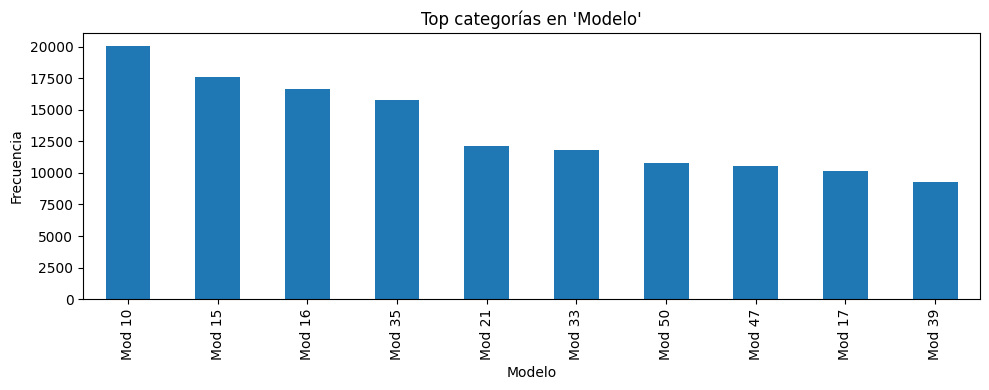

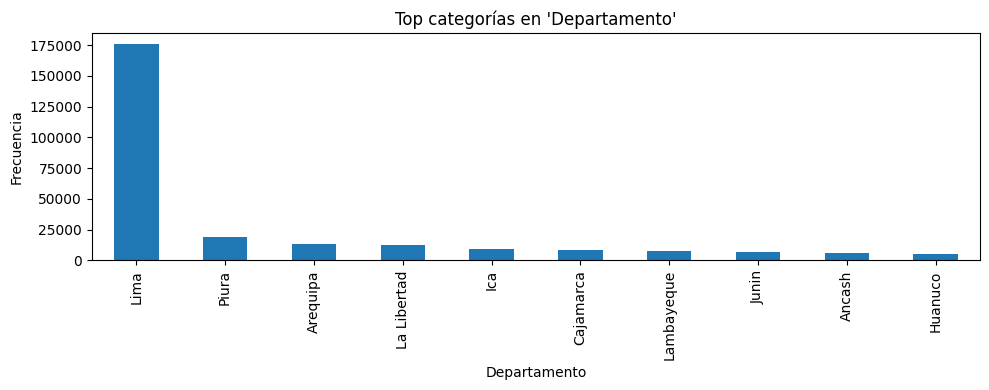

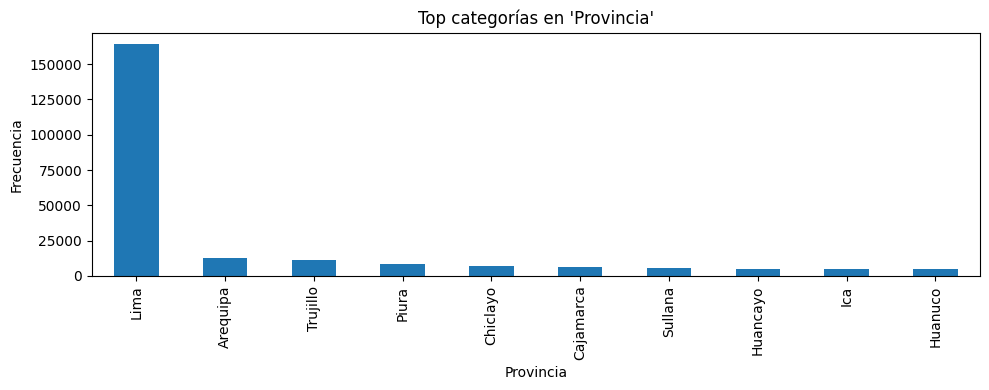

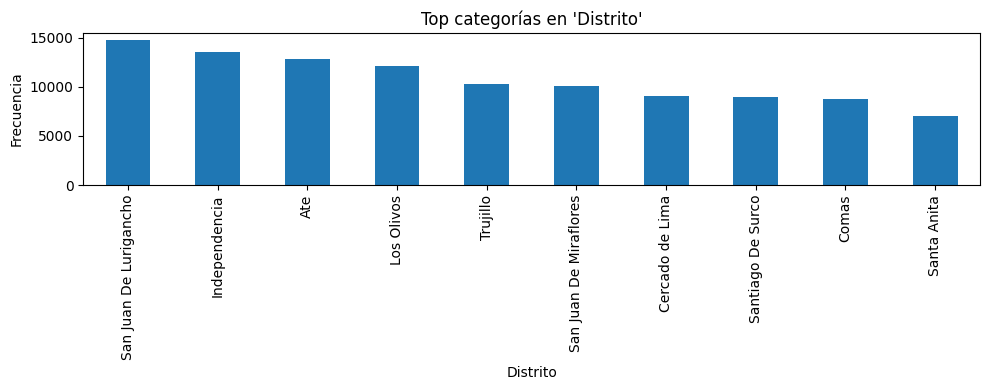

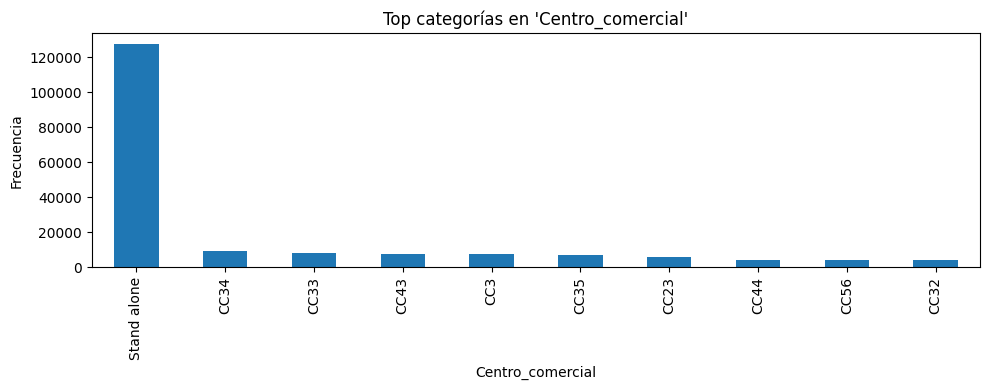

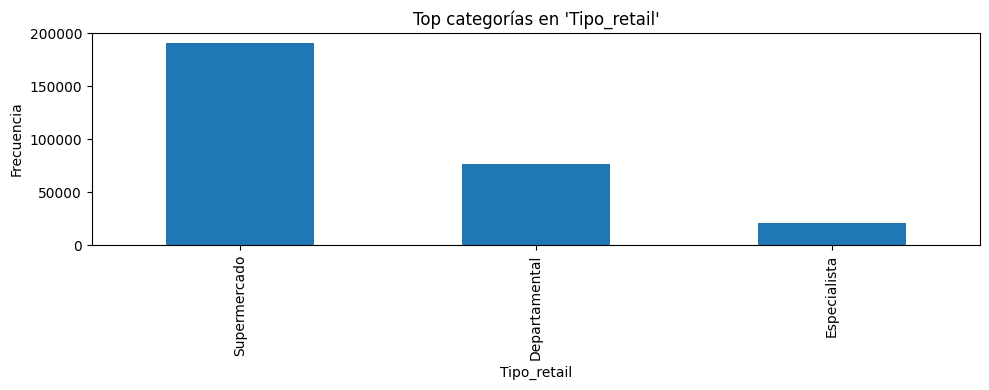

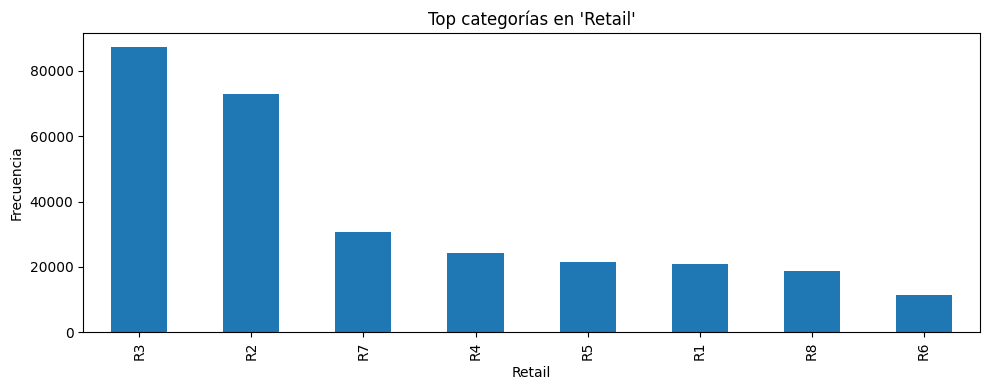

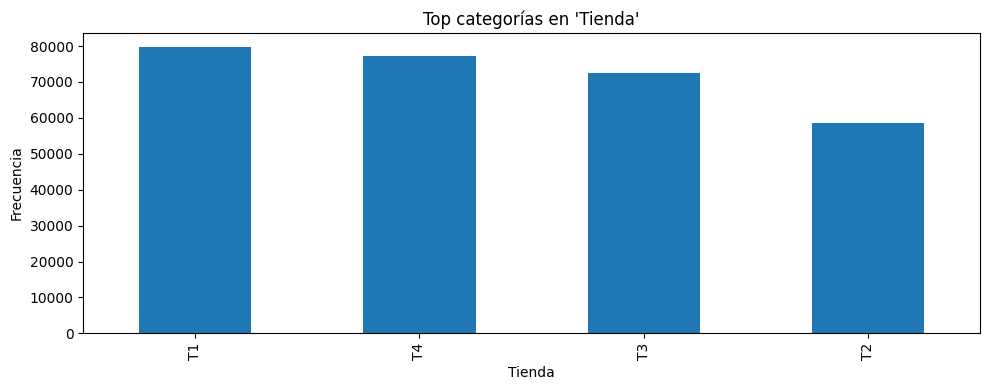

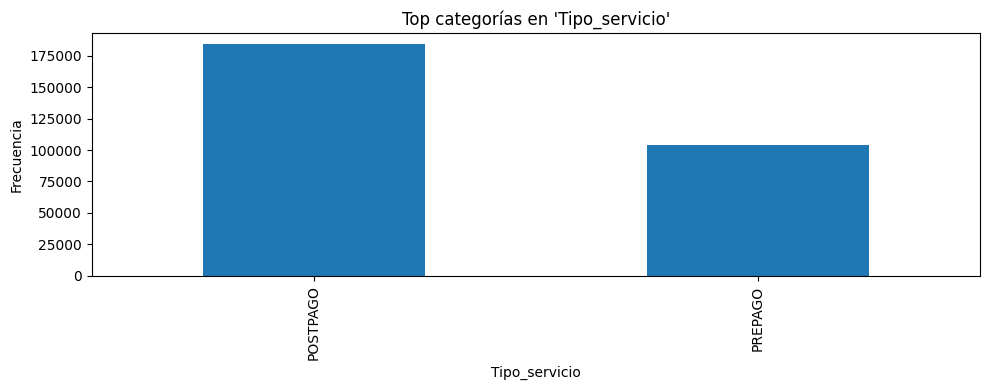

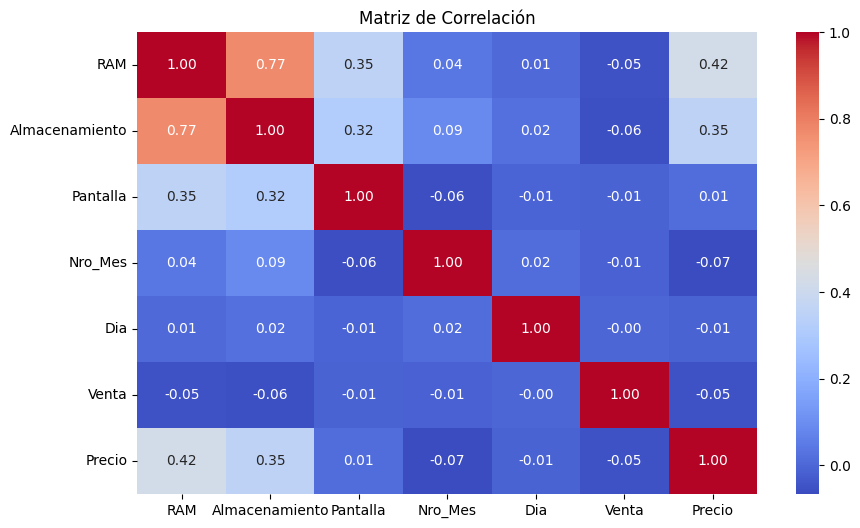

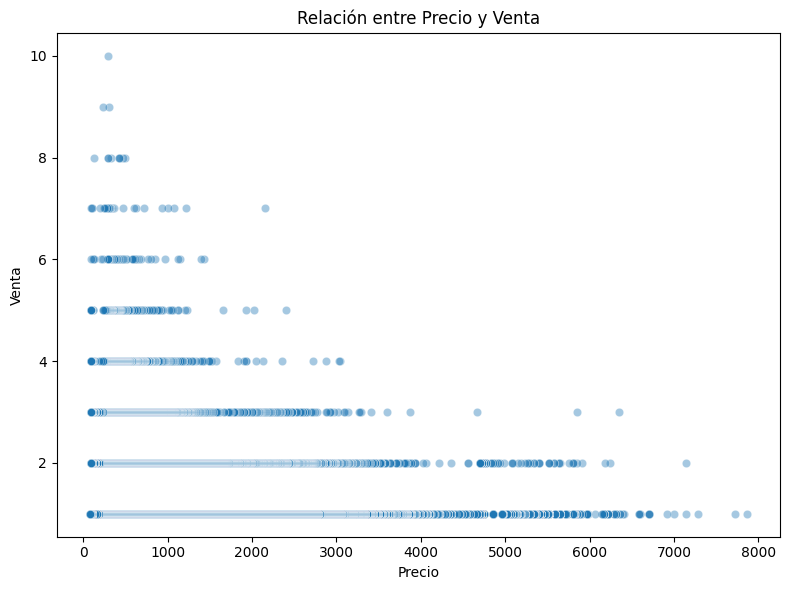

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 4. Distribución de variables numéricas
num_cols = ['RAM', 'Almacenamiento', 'Pantalla', 'Nro_Mes', 'Dia', 'Venta', 'Precio']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# 5. Conteo de variables categóricas
cat_cols = ['Marca', 'Modelo', 'Departamento', 'Provincia', 'Distrito',
            'Centro_comercial', 'Tipo_retail', 'Retail', 'Tienda', 'Tipo_servicio']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top categorías en '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# 6. Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# 7. Relación entre Precio y Venta
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Precio', y='Venta', alpha=0.4)
plt.title("Relación entre Precio y Venta")
plt.xlabel("Precio")
plt.ylabel("Venta")
plt.tight_layout()
plt.show()


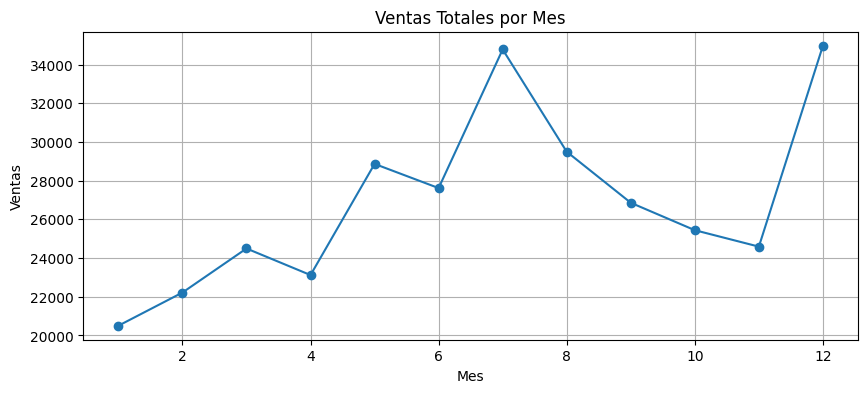

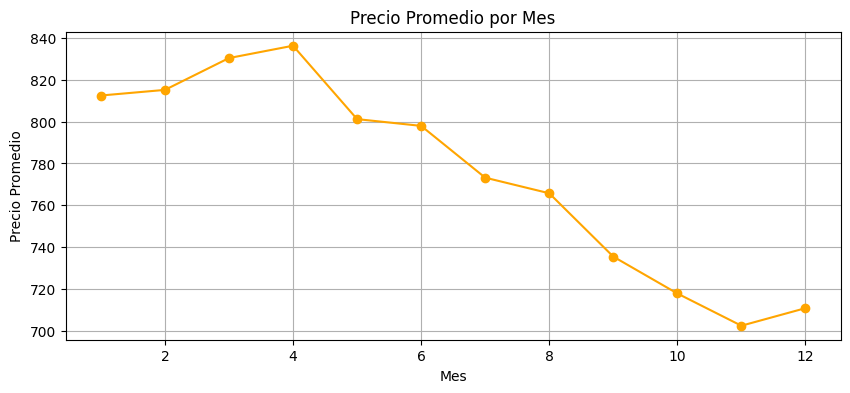

In [ ]:
# Asegurarse de que 'Fecha' sea tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Agrupación por mes (usando Nro_Mes o extrayendo del campo Fecha)
ventas_mensuales = df.groupby('Nro_Mes')['Venta'].sum()
precio_mensual_prom = df.groupby('Nro_Mes')['Precio'].mean()

# Gráfico de ventas por mes
plt.figure(figsize=(10, 4))
ventas_mensuales.plot(marker='o')
plt.title("Ventas Totales por Mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.grid()
plt.show()

# Gráfico de precio promedio por mes
plt.figure(figsize=(10, 4))
precio_mensual_prom.plot(marker='o', color='orange')
plt.title("Precio Promedio por Mes")
plt.xlabel("Mes")
plt.ylabel("Precio Promedio")
plt.grid()
plt.show()


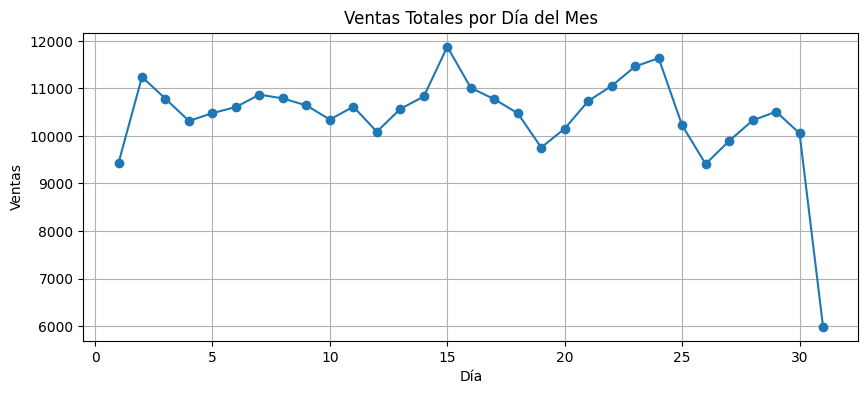

In [ ]:
ventas_por_dia = df.groupby('Dia')['Venta'].sum()

plt.figure(figsize=(10, 4))
ventas_por_dia.plot(marker='o')
plt.title("Ventas Totales por Día del Mes")
plt.xlabel("Día")
plt.ylabel("Ventas")
plt.grid()
plt.show()


Parte 2: Preparación para Predicción Conformal
1. Selección de columnas relevantes

Vamos a quedarnos con variables útiles:

In [ ]:
# Variables numéricas y categóricas
vars_utiles = ['Marca', 'Modelo', 'RAM', 'Almacenamiento', 'Pantalla', 'Precio']
df_model = df[vars_utiles + ['Venta']].dropna()


 2. Codificación de variables categóricas

Usamos pd.get_dummies para codificar texto:

In [ ]:
df_model = pd.get_dummies(df_model, columns=['Marca', 'Modelo'], drop_first=True)



3. Separar en variables predictoras y target

In [ ]:
X = df_model.drop('Venta', axis=1)
y = df_model['Venta']

 4. Dividir los datos (Entrenamiento / Calibración / Prueba)

In [ ]:
from sklearn.model_selection import train_test_split

# 60% train, 20% calibration, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


Predicción Conformal con RandomForest (modelo de regresión (Random Forest) junto con el método Conformal Prediction con Residuales (Split Conformal).)

Paso 1: Entrenar el modelo de regresión

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo con el conjunto de entrenamiento
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Paso 2: Calcular los residuos sobre el conjunto de calibración

In [ ]:
# Hacer predicciones sobre el conjunto de calibración
y_calib_pred = model.predict(X_calib)

# Calcular residuos absolutos (error entre predicción y valor real)
residuos = abs(y_calib - y_calib_pred)

# Seleccionar el percentil deseado (por ejemplo, 90%)
import numpy as np
alpha = 0.1  # Para 90% de confianza
q = np.quantile(residuos, 1 - alpha)

print(f"Umbral de error (q): {q:.2f}")


Umbral de error (q): 0.30


 Paso 3: Predecir sobre nuevos datos y generar intervalos

In [ ]:
# Predecir sobre el conjunto de prueba
y_test_pred = model.predict(X_test)

# Construir intervalos conformales
inferior = y_test_pred - q
superior = y_test_pred + q

# Mostrar algunos intervalos ejemplo
for i in range(5):
    print(f"Predicción: {y_test_pred[i]:.0f} | Intervalo 90%: [{inferior[i]:.0f}, {superior[i]:.0f}] | Real: {y_test.iloc[i]:.0f}")


Predicción: 1 | Intervalo 90%: [1, 1] | Real: 1
Predicción: 1 | Intervalo 90%: [1, 1] | Real: 1
Predicción: 1 | Intervalo 90%: [1, 1] | Real: 1
Predicción: 3 | Intervalo 90%: [2, 3] | Real: 2
Predicción: 1 | Intervalo 90%: [1, 1] | Real: 1


Agrupar venta por modelo por día (no por tienda)
1. Agrupar ventas por modelo y fecha (acumuladas en todas las tiendas)

In [ ]:
# Asegurar tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Agrupar por modelo y fecha (venta total por modelo en todas las tiendas)
df_modelo_dia = df.groupby([
    'Fecha', 'Marca', 'Modelo', 'RAM', 'Almacenamiento', 'Pantalla'
])[['Venta', 'Precio']].sum().reset_index()


print(df_modelo_dia.head())


       Fecha    Marca  Modelo  RAM  Almacenamiento  Pantalla  Venta  Precio
0 2024-01-01  Marca 1   Mod 2  4.0           128.0       6.1     25   50383
1 2024-01-01  Marca 1   Mod 3  6.0           128.0       6.1      1    2469
2 2024-01-01  Marca 1   Mod 4  6.0           128.0       6.1      1    2998
3 2024-01-01  Marca 1   Mod 5  8.0           256.0       6.7      1    4728
4 2024-01-01  Marca 2  Mod 10  4.0            64.0       6.5     10    4885


2. Preparar los datos para el modelo (X, y)

In [ ]:
# Eliminar Fecha antes de codificar
df_modelo_dia = df_modelo_dia.drop(columns=['Fecha'])

# Separar X e y
X = df_modelo_dia.drop('Venta', axis=1)
y = df_modelo_dia['Venta']

# Codificación
X = pd.get_dummies(X, columns=['Marca', 'Modelo'], drop_first=True)

# Convertir todo a numérico
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y[X.index]


3. Dividir en entrenamiento, calibración y prueba

In [ ]:
from sklearn.model_selection import train_test_split

# 60% entrenamiento, 20% calibración, 20% prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


4. Entrenar modelo de regresión

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

5. Calibrar el modelo (predicción conformal)

In [ ]:
import numpy as np

# Predicciones sobre calibración
y_calib_pred = model.predict(X_calib)

# Errores absolutos
residuos = abs(y_calib - y_calib_pred)

# Umbral para intervalo de confianza (90%)
alpha = 0.1
q = np.quantile(residuos, 1 - alpha)

print(f"Umbral de error (q): {q:.2f}")


Umbral de error (q): 8.42


6. Predecir e inferir intervalos sobre datos nuevos

In [ ]:
# Predicción sobre el conjunto de prueba
y_test_pred = model.predict(X_test)

# Intervalos conformales
inferior = y_test_pred - q
superior = y_test_pred + q

# Mostrar ejemplos
print("Ejemplos de predicción con intervalo 90%:")
for i in range(10):
    print(f"Pred: {y_test_pred[i]:.0f} | Intervalo: [{inferior[i]:.0f}, {superior[i]:.0f}] | Real: {y_test.iloc[i]:.0f}")


Ejemplos de predicción con intervalo 90%:
Pred: 13 | Intervalo: [5, 22] | Real: 15
Pred: 21 | Intervalo: [12, 29] | Real: 21
Pred: 37 | Intervalo: [29, 46] | Real: 26
Pred: 25 | Intervalo: [17, 34] | Real: 23
Pred: 17 | Intervalo: [8, 25] | Real: 16
Pred: 40 | Intervalo: [31, 48] | Real: 51
Pred: 7 | Intervalo: [-2, 15] | Real: 5
Pred: 13 | Intervalo: [5, 22] | Real: 13
Pred: 13 | Intervalo: [5, 21] | Real: 20
Pred: 13 | Intervalo: [5, 22] | Real: 14


Verificar visualmente los intervalos de predicción conformal

1. Crear un gráfico de barras con líneas de error

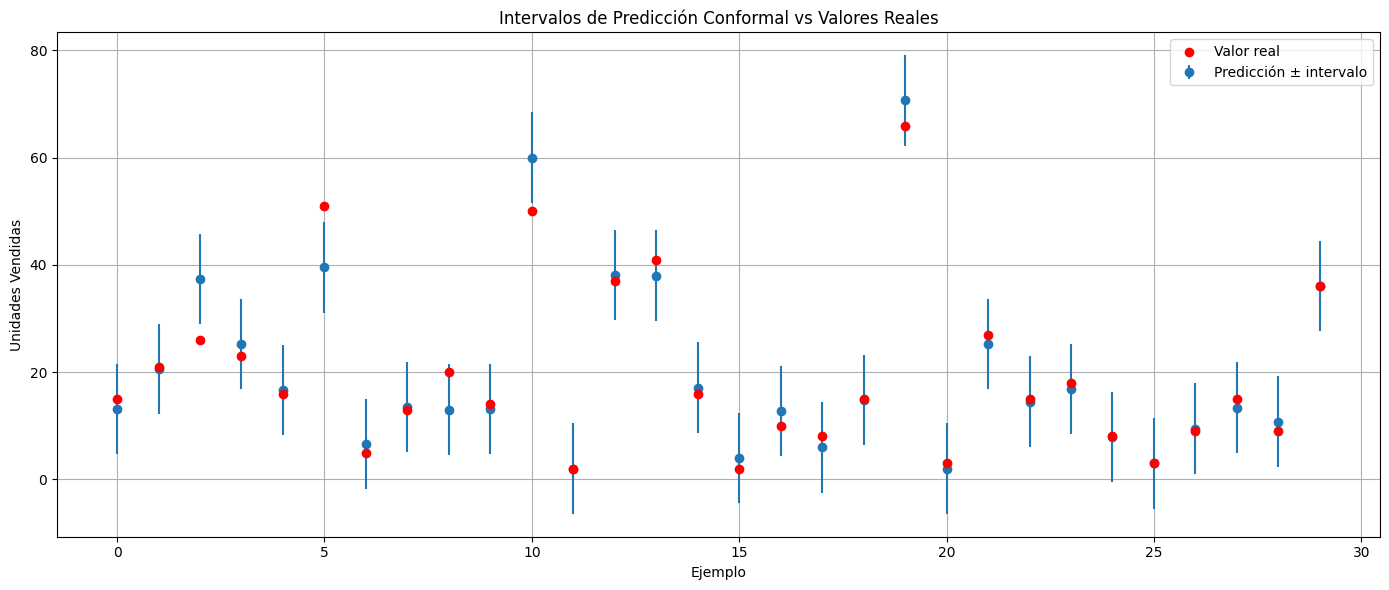

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tomamos los primeros 30 valores para visualizar
n = 30
preds = y_test_pred[:n]
true_vals = y_test.iloc[:n].values
lower_bounds = inferior[:n]
upper_bounds = superior[:n]

x = np.arange(n)

plt.figure(figsize=(14, 6))
plt.errorbar(x, preds, yerr=[preds - lower_bounds, upper_bounds - preds], fmt='o', label='Predicción ± intervalo')
plt.scatter(x, true_vals, color='red', label='Valor real', zorder=5)
plt.title('Intervalos de Predicción Conformal vs Valores Reales')
plt.xlabel('Ejemplo')
plt.ylabel('Unidades Vendidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2. Verificar la cobertura real del intervalo

Esto nos dice qué porcentaje de veces el valor real cayó dentro del intervalo generado

In [ ]:
# Evaluar cuántos valores reales están dentro del intervalo
cubre = (y_test >= inferior) & (y_test <= superior)
cobertura_real = cubre.mean()

print(f"Cobertura del intervalo: {cobertura_real*100:.2f}%")

Cobertura del intervalo: 90.92%
